# Gathering artist names

The text containing artist names was taken from the JavaScript code of the page, and was saved in the sources file.

### All artists:

In [18]:
with open('sources/js_artists_curators_all.txt', 'r', encoding="utf-8") as f: #Using UTF-8 is very important!
    html = f.read()

Parse it:

In [19]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
lines  = soup.find_all('span', {'class': 'filter-item-clickable js-filter-item'})
print(lines[0])

<span class="filter-item-clickable js-filter-item" data-filter="A.J. Lode Janssens" data-id="1" data-name="p">
<span class="filter-item__title">A.J. Lode Janssens</span> <span class="filter-item__size">1</span></span>


We just take the "data-filter" (tag) attribute of the divs, because that includes the artist's name.

In [20]:
artists = [line['data-filter'] for line in lines]

Save the names in a separate file:

In [21]:
with open('data/eflux_artists.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(artists))
    #.join() is good for only placing characters/strings between elements, not at the end nor beginning

That was simple (although some problems arise, more about that later). Let's do it for only the artists marked as contemporary too, and the ones "assumably contemporary" (note: none of these are a good indicator of who did contemporary art):

### Tagged contemporary artists:

In [22]:
with open('sources/js_artists_curators_contemporary.txt', 'r', encoding="utf-8") as f: #Using UTF-8 is very important!
    html = f.read()
soup = BeautifulSoup(html, 'html.parser')
lines = soup.find_all('span', {'class': 'filter-item-clickable js-filter-item'})
artists_contemporary = [line['data-filter'] for line in lines]
with open('data/eflux_artists_contemporary.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(artists_contemporary)) 

### Assumably contemporary artists:

These are artists collected under the categories "Contemporary Art", "Data & Information", "Installation", "Mixed Media", "Posthumanism", "Postmodernism" and "Technology".
One can access this sub-category via this [this URL](https://www.e-flux.com/announcements/?c[]=Contemporary%20Art&c[]=Data%20%26%20Information&c[]=Installation&c[]=Mixed%20Media&c[]=Posthumanism&c[]=Postmodernism&c[]=Technology).

In [23]:
with open('sources/js_artists_curators_contemporary_extended.txt', 'r', encoding="utf-8") as f: #Using UTF-8 is very important!
    html = f.read()
soup = BeautifulSoup(html, 'html.parser')
lines = soup.find_all('span', {'class': 'filter-item-clickable js-filter-item'})
artists_contemporary_extended = [line['data-filter'] for line in lines]
with open('data/eflux_artists_contemporary_extended.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(artists_contemporary_extended))

### Extending the artist list:

There is a problem however. When loading the website to gather all artists, only 20000 appear (and in fact, scrolling does not give more options), therefore `artists` only collects artists till the letter P (more precisely, till artist "PT").

In [24]:
artists[-20:]

['PORTIKUS',
 'PRATT Institute',
 'PRAXES',
 'PRH',
 'PS',
 'PS1',
 'PSA',
 'PSM',
 'PT',
 '!Mediengruppe Bitnik',
 '(LA)HORDE',
 '(Un)usual Business',
 '*foundationClass',
 '3as4',
 '4space',
 '9eme collectif des Sans Papier',
 '18th Street Arts Center',
 '98weeks Belgrade',
 '1000 BCE',
 ':mentalKLINIK']

(The last few are special character names starting names, but there is nothing with "Q" or "R" and so on in the list.)

But the "assumably contemporary" artists have less than 20000 artists, so they have artists with starting letter R, S, T ... We could extend the list of e-flux artists by adding the "assumably contemporary extended" artists not contained in our "all artists" dataset (so basically the ones which didn't make it to the first 20000) to the list of all artists.

In [25]:
import numpy

#artists_contemporary_extended_lower = [artist.lower() for artist in artists_contemporary_extended]
#This is because there are some artists that are in both lists, but with different capitalization (Kaufmann Repetto, for example)
#As of now, this is kept as is, later for querying we can combine instances
artists_extended = (numpy.union1d(artists, artists_contemporary_extended))

In [26]:
len(artists_extended)

22285

Save the combined list:

In [ ]:
with open('data/eflux_artists.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(artists_extended))

## Further problems:

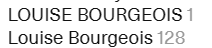